## This notebook is used for demonstrations (final presentation)

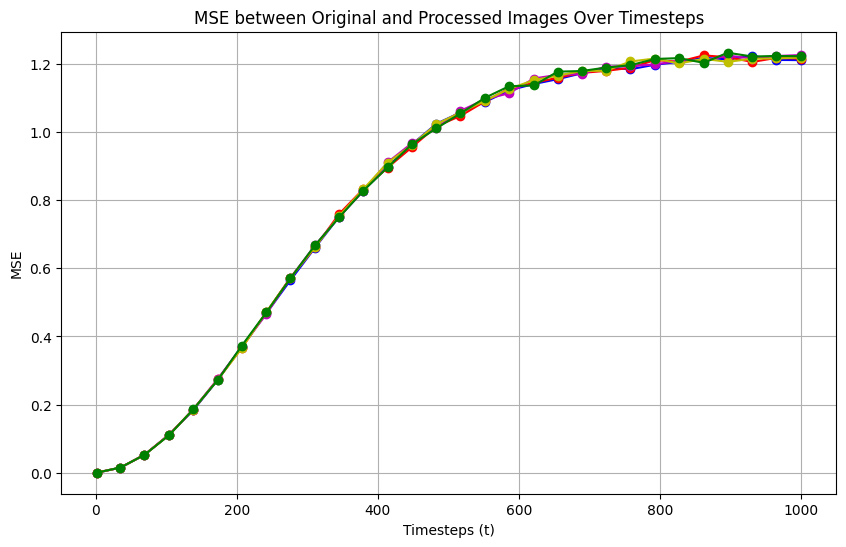

[[9.901807061396539e-05,
  0.015288286842405796,
  0.05264078453183174,
  0.11197405308485031,
  0.18286718428134918,
  0.27260470390319824,
  0.3703784942626953,
  0.46840524673461914,
  0.564811110496521,
  0.6607164144515991,
  0.7511427998542786,
  0.8273217082023621,
  0.8982285857200623,
  0.9630002975463867,
  1.0241848230361938,
  1.0569878816604614,
  1.0880028009414673,
  1.122125267982483,
  1.1405181884765625,
  1.1549335718154907,
  1.1719974279403687,
  1.1889722347259521,
  1.1838282346725464,
  1.1973627805709839,
  1.2056889533996582,
  1.2174547910690308,
  1.2129011154174805,
  1.223610520362854,
  1.2112315893173218,
  1.2107001543045044],
 [9.921056334860623e-05,
  0.01513008400797844,
  0.053018052130937576,
  0.11176107078790665,
  0.18506307899951935,
  0.27381160855293274,
  0.36644551157951355,
  0.4709784984588623,
  0.5726079344749451,
  0.6617373824119568,
  0.7592930793762207,
  0.8317610621452332,
  0.8955618739128113,
  0.9547346234321594,
  1.0165234804

In [22]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Calculate the mse between 2 mages
def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return torch.linspace(start, end, timesteps)

def mse_img_diffence(image1, image2):
    if image1.size() != image2.size():
        raise ValueError("Images must have the same dimensions for MSE calculation")
    mse = torch.mean((image1 - image2) ** 2).item()
    return mse

def load_image(image_path):
    transform = transforms.Compose([
        transforms.ToTensor()  # Convert image to PyTorch tensor
    ])
    image = Image.open(image_path).convert('RGB')  # Ensure it's RGB
    return transform(image)

def load_image_as_tensor(image_path, image_size=(128, 128)):
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),  # Converts to tensor and scales pixel values to [0, 1]
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])
    
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).view(1, -1)  # Flatten for diffusion algorithm
    return image_tensor

def mse_img_difference(image1, image2):
    if image1.size() != image2.size():
        raise ValueError("Images must have the same dimensions for MSE calculation")
    mse = torch.mean((image1 - image2) ** 2).item()
    return mse

def forward_process(T, t, x_0, linear_beta_schedule_val):
    alpha = 1.0 - linear_beta_schedule_val
    # print(alpha)
    
    bar_alpha = torch.cumprod(alpha, dim=0)
    sqrt_bar_alpha = bar_alpha[t - 1].sqrt()
    # print(bar_alpha)
    
    sqrt_one_minus_bar_alpha = (1 - bar_alpha[t - 1]).sqrt()

    batch_size, dim = x_0.size()
    epsilon = torch.randn(batch_size, dim)
    
    x_t = sqrt_bar_alpha * x_0 + sqrt_one_minus_bar_alpha * epsilon
    
    return x_t 

image1 = load_image_as_tensor("./data/person/test_person.jpg")
# image2 = load_image("./resources/computed.jpg")

# print(mse_img_diffence(image1, image2))


def calculate_mse_over_timesteps(x_0, T=1000, steps=30, image_size=(128, 128)):
    # timesteps = torch.linspace(1, T, steps, dtype=torch.int32)  # Evenly spaced timesteps
    timesteps = []
    mse_values = []
    linear_beta_schedule_val = []
    
    # 5 arrays of noise to give 5 examples
    for i in range(5):
        timesteps.append(torch.linspace(1, T, steps, dtype=torch.int32))  # Evenly spaced timesteps
        linear_beta_schedule_val.append(linear_beta_schedule(T))

        # mse_values = []
        # i = 0
        mse_val = []
        for t in timesteps[i]:
            x_t = forward_process(T, t.item(), x_0, linear_beta_schedule_val[i])
            mse_val.append(mse_img_difference(x_0, x_t))
        mse_values.append(mse_val)
    
    # Plot the graph
    colors = ['b', 'r', 'm', 'y', 'g']
    plt.figure(figsize=(10, 6))
    for i in range(5):
        plt.plot(timesteps[i].numpy(), mse_values[i], marker='o', linestyle='-', color=colors[i])
    plt.xlabel("Timesteps (t)")
    plt.ylabel("MSE")
    plt.title("MSE between Original and Processed Images Over Timesteps")
    plt.grid()
    plt.show()

    return mse_values

calculate_mse_over_timesteps(image1)
